<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.298275,89.168836,66.419896,-36.735299,153.151707,182.953933,-29.802225
1,0.0,1.0,79.733570,20.401260,28.653424,8.371401,147.159655,150.696887,-3.537233
2,0.0,2.0,53.848024,85.323462,22.614568,29.044502,200.830556,186.874928,13.955628
3,0.0,3.0,89.067140,57.246276,29.538091,3.729058,189.580564,201.430155,-11.849591
4,0.0,4.0,80.193376,83.195670,54.889737,-19.905575,208.373208,234.041970,-25.668762
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.561860,44.238571,51.251160,1.983306,174.034897,167.526592,6.508305
119996,999.0,116.0,54.926598,55.813571,59.268155,1.057361,181.065684,176.822063,4.243621
119997,999.0,117.0,98.130694,58.321197,59.202459,12.870909,238.525260,221.140877,17.384383
119998,999.0,118.0,77.497054,49.033916,30.450373,-24.928425,142.052918,159.944592,-17.891674


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.298275,89.168836,66.419896,-36.735299,153.151707,182.953933,-29.802225
1,0.0,1.0,79.733570,20.401260,28.653424,8.371401,147.159655,150.696887,-3.537233
2,0.0,2.0,53.848024,85.323462,22.614568,29.044502,200.830556,186.874928,13.955628
3,0.0,3.0,89.067140,57.246276,29.538091,3.729058,189.580564,201.430155,-11.849591
4,0.0,4.0,80.193376,83.195670,54.889737,-19.905575,208.373208,234.041970,-25.668762
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.561860,44.238571,51.251160,1.983306,174.034897,167.526592,6.508305
119996,999.0,116.0,54.926598,55.813571,59.268155,1.057361,181.065684,176.822063,4.243621
119997,999.0,117.0,98.130694,58.321197,59.202459,12.870909,238.525260,221.140877,17.384383
119998,999.0,118.0,77.497054,49.033916,30.450373,-24.928425,142.052918,159.944592,-17.891674


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

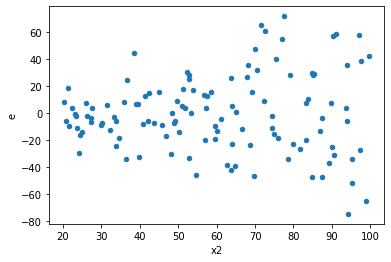

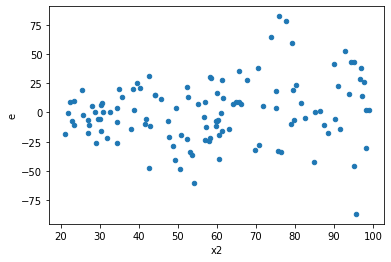

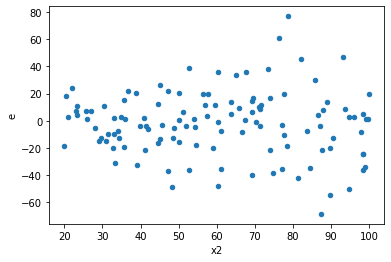

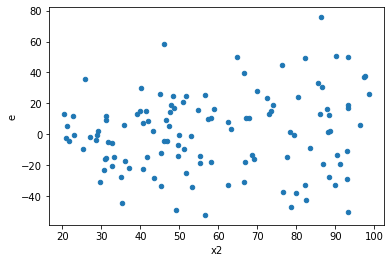

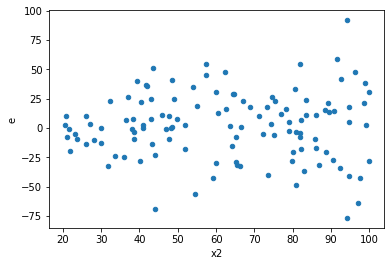

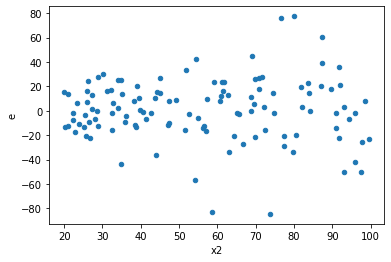

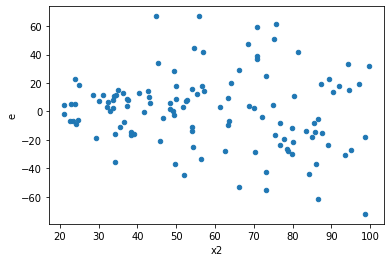

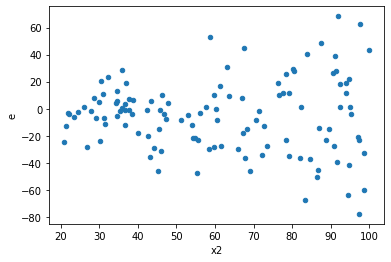

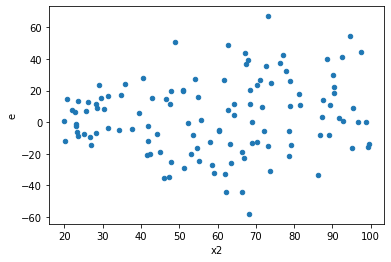

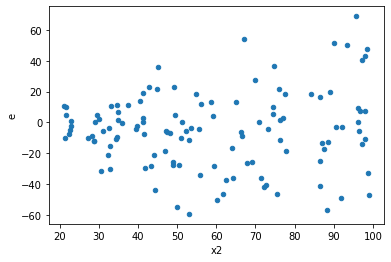

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,67.0,47.0,39624.375127165964,41200.9591103159,591.4085839875517,876.616151283317,1.4822513149416319,0.15574874945926753,0.9221256252703662,0.07787437472963377,Reject001=1 : Homoscedasticity
2.0,65.0,49.0,32138.606397810574,31922.208744582866,494.440098427855,651.4736478486299,1.3175987342452324,0.3145850896271871,0.8427074551864064,0.15729254481359356,Reject001=1 : Homoscedasticity
4.0,43.0,71.0,15614.934153075039,73881.65708904616,363.1380035598846,1040.5867195640303,2.8655406742423986,8.220581671092297e-05,0.9999588970916445,4.110290835546149e-05,Reject001=0 : Heteroscedasticity
5.0,64.0,50.0,30166.844986476102,41036.71324027877,471.3569529136891,820.7342648055753,1.7412159929586553,0.04316260241111136,0.9784186987944443,0.02158130120555568,Reject001=1 : Homoscedasticity
7.0,62.0,52.0,33192.19967548416,47428.85633168057,535.3580592820026,912.093390993857,1.7037072202053227,0.04994649470661483,0.9750267526466926,0.024973247353307415,Reject001=1 : Homoscedasticity
10.0,61.0,53.0,31528.365220246997,51187.74773803305,516.8584462335573,965.8065610949633,1.8686094193351654,0.021295893214270167,0.9893520533928649,0.010647946607135084,Reject001=1 : Homoscedasticity
12.0,59.0,55.0,27289.88718544884,49399.069647175056,462.5404607703193,898.1649026759101,1.941808293224981,0.013971156901707138,0.9930144215491464,0.006985578450853569,Reject001=1 : Homoscedasticity
13.0,65.0,49.0,49805.8328365838,42657.676541166315,766.2435821012892,870.5648273707411,1.1361463217523715,0.644908784108096,0.677545607945952,0.322454392054048,Reject001=1 : Homoscedasticity
17.0,59.0,55.0,30781.929228246514,60757.44558938318,521.7276140380765,1104.680828897876,2.117351658555789,0.005589212993876602,0.9972053935030617,0.002794606496938301,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,67.0,47.0,39624.375127165964,41200.9591103159,591.4085839875517,876.616151283317,1.4822513149416319,0.15574874945926753,Reject001=1 : Homoscedasticity
1.0,45.0,69.0,38810.81379172437,38314.4386828949,862.4625287049861,555.281720041955,0.643832864107995,0.11683133345630661,Reject001=1 : Homoscedasticity
2.0,65.0,49.0,32138.606397810574,31922.208744582866,494.440098427855,651.4736478486299,1.3175987342452324,0.3145850896271871,Reject001=1 : Homoscedasticity
3.0,57.0,57.0,48406.59653064788,23822.455687704824,849.2385356254015,417.9378190825408,0.49213242398940416,0.008346859875304473,Reject001=0 : Heteroscedasticity
4.0,43.0,71.0,15614.934153075039,73881.65708904616,363.1380035598846,1040.5867195640303,2.8655406742423986,8.220581671092297e-05,Reject001=0 : Heteroscedasticity
5.0,64.0,50.0,30166.844986476102,41036.71324027877,471.3569529136891,820.7342648055753,1.7412159929586553,0.04316260241111136,Reject001=1 : Homoscedasticity
6.0,63.0,51.0,42886.21086949566,31052.72038545089,680.7335058650106,608.8768703029587,0.8944423405885635,0.6693726086989757,Reject001=1 : Homoscedasticity
7.0,62.0,52.0,33192.19967548416,47428.85633168057,535.3580592820026,912.093390993857,1.7037072202053227,0.04994649470661483,Reject001=1 : Homoscedasticity
8.0,67.0,47.0,46942.331414993605,13969.146164948246,700.6318121640836,297.2158758499627,0.4242112200585556,0.0012800526453910959,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      666
Reject001=0 : Heteroscedasticity    334
Name: Result_test, dtype: int64